# Adding absorption to the pharmacokinetic equation

To date, we have modeled opioid concentration with a first order elimination equation. This assumes that, when a dose is taken, the entire dose is absorbed prior to the next time step (i.e., within 15 minutes). This is accurate for injection, but not for other forms of administration, orally-consumed pills in particular.

To model different modes of administration, we need to extend our pharmacokinetic equation to include absorption as well as extraction. The general approach is outlined in [Pharmacokinetics of Oral Absorption](https://accesspharmacy.mhmedical.com/content.aspx?bookid=513&sectionid=41488025). Equation 7.11 from this source is what we'll follow.

The content of this notebook is an exploration of this extended PK equation with visualization to ensure it works as expected. The updated equation will eventually be implemented in the VOU source code.

In [4]:
import math
from typing import Callable

from matplotlib import pyplot as plt

In [7]:
def compute_concentration(
    conc_when_dose_taken: float, amount_taken: int, t: int, ke: float = 0.0594, ka = None
):
    """
    Copied from the current vou.simulation source code, with parameters modified
    to work as a standalone equation rather than as a Simulation method.

    Ka is included as a parameter for ease of use with the plotting function but is not used.
    """
    return (conc_when_dose_taken + amount_taken) * math.exp(-ke * t)

In [17]:
def plot_conc_curve(
    conc_function: Callable,
    conc_when_dose_taken: float,
    amount_taken: int,
    time_span: int,
    ka: float = None,
):
    """
    Using the concentration function, plot the concentration curve over the specified
    number of time steps. 
    """
    conc = []
    for t in range(time_span):
        conc.append(
            conc_function(
                conc_when_dose_taken=conc_when_dose_taken,
                amount_taken=amount_taken,
                t=t,
                ka=ka
            )
        )
    plt.plot(conc)
    plt.grid()


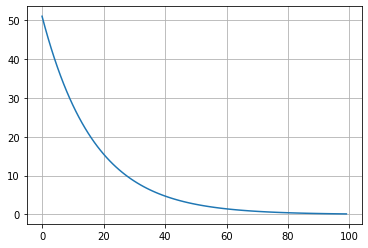

In [18]:
plot_conc_curve(conc_function=compute_concentration, conc_when_dose_taken=1, amount_taken=50, time_span=100)

In [10]:
def compute_conc_with_absorption(
    conc_when_dose_taken: float,
    amount_taken: int,
    t: int,
    ka: float,
    ke: float = 0.0594,
):
    """
    Adds an absorption coefficient (Ka) to the PK equation.
    """
    D = conc_when_dose_taken + amount_taken

    C = ((D * ka) / (ka - ke)) * ((math.exp(-ke * t)) - (math.exp(-ka * t)))

    return C

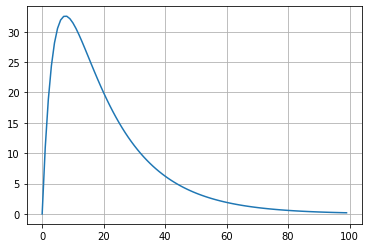

In [19]:
plot_conc_curve(conc_function=compute_conc_with_absorption, conc_when_dose_taken=1, amount_taken=50, time_span=100, ka=0.25)

Looks about right. We'll have to find some justification for the right value to use for Ka.

0.4 seems about right, with peak at ~5 time steps or an hour and 15 minutes.

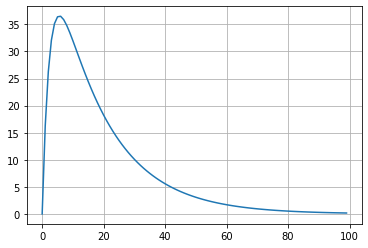

In [22]:
plot_conc_curve(conc_function=compute_conc_with_absorption, conc_when_dose_taken=1, amount_taken=50, time_span=100, ka=0.4)

As Ka increases, the function begins to behave more and more like the absorption-only function.

We can leverage this to use a single PK function and vary Ka by mode of administration.

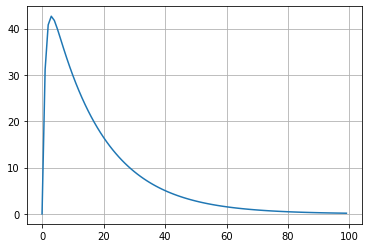

In [24]:
plot_conc_curve(conc_function=compute_conc_with_absorption, conc_when_dose_taken=1, amount_taken=50, time_span=100, ka=1)

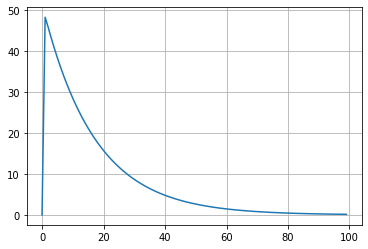

In [25]:
plot_conc_curve(conc_function=compute_conc_with_absorption, conc_when_dose_taken=1, amount_taken=50, time_span=100, ka=5)

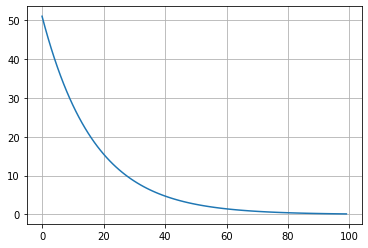

In [28]:
plot_conc_curve(conc_function=compute_concentration, conc_when_dose_taken=1, amount_taken=50, time_span=100)